In [46]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [47]:
import requests

def download(url, filename):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            with open(filename, "wb") as f:
                f.write(response.content)
            print(f"Downloaded {filename} from {url}")
        else:
            print(f"Failed to download {filename}. Status code: {response.status_code}")
    except Exception as e:
        print(f"An error occurred: {e}")

In [48]:
path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
download(path, "ChurnData.csv")
path="ChurnData.csv"

Downloaded ChurnData.csv from https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv


In [49]:
chrun_df = pd.read_csv(path)
chrun_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [50]:
chrun_df.isna().sum()

tenure      0
age         0
address     0
income      0
ed          0
employ      0
equip       0
callcard    0
wireless    0
longmon     0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
longten     0
tollten     0
cardten     0
voice       0
pager       0
internet    0
callwait    0
confer      0
ebill       0
loglong     0
logtoll     0
lninc       0
custcat     0
churn       0
dtype: int64

In [51]:
chrun_df = chrun_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
chrun_df['churn']= chrun_df['churn'].astype('int')
chrun_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [52]:
chrun_df.shape

(200, 10)

In [53]:
chrun_df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'churn'],
      dtype='object')

In [54]:
y = chrun_df[['churn']].values
X = chrun_df.drop(columns=['churn']).values

In [55]:
y[0:5]

array([[1],
       [1],
       [0],
       [0],
       [0]])

In [56]:
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.,   1.,   1.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.,   0.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.,   1.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.,   1.,   0.]])

In [57]:
from sklearn import preprocessing
##we normalize the dataset:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.14, -0.63, -0.46,  0.48,  1.7 , -0.58, -0.86,  0.65,  1.56],
       [-0.12, -0.63,  0.03, -0.33, -0.64, -1.14, -0.86, -1.55, -0.64],
       [-0.58, -0.86, -0.26, -0.35, -1.42, -0.92, -0.86, -1.55, -0.64],
       [ 0.12, -0.47, -0.66,  0.01, -0.64, -0.03,  1.16,  0.65,  1.56],
       [-1.32, -0.47,  0.23,  0.04, -0.64,  0.53, -0.86,  0.65, -0.64]])

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 9) (160, 1)
Test set: (40, 9) (40, 1)


## Here's a brief explanation of each solver:

## 'newton-cg' (Newton-Conjugate-Gradient):

This solver uses the Newton-Conjugate-Gradient optimization method.
It approximates the Hessian matrix (second derivative of the cost function) and uses it to iteratively update the weights.
Suitable for small to medium-sized datasets with smooth, convex cost functions.
## 'lbfgs' (Limited-memory Broyden-Fletcher-Goldfarb-Shanno):

This solver uses the L-BFGS optimization method, which is an optimization algorithm that approximates the inverse Hessian matrix.
It is efficient for large datasets and doesn't require a lot of memory.
Works well for logistic regression and linear SVMs.
## 'liblinear':

This solver is based on a coordinate descent algorithm.
It's optimized for linear models and works well with high-dimensional datasets.
It's suitable for both binary and multiclass classification problems.
Efficient for small to medium-sized datasets.
## 'sag' (Stochastic Average Gradient):

This solver uses a stochastic gradient descent algorithm with an averaging step.
It computes the gradient using a subset of training data (stochastic gradient) and then averages them over a number of iterations.
Efficient for large datasets and can speed up convergence.
## 'saga':

Similar to 'sag', 'saga' is also a variant of stochastic gradient descent.
It's an improved version of 'sag' that can handle non-smooth loss functions and is suitable for large datasets.
It's also well-suited for problems with a large number of features.

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C = 0.01,solver='liblinear').fit(X_train,y_train)
LR

c:\Users\Mostafa Arafa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, solver='liblinear')

In [60]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [61]:
LR.score(X_test,y_test)

0.65

**predict_proba**  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):


In [62]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.59, 0.41],
       [0.57, 0.43],
       [0.53, 0.47],
       [0.67, 0.33],
       [0.53, 0.47],
       [0.6 , 0.4 ],
       [0.5 , 0.5 ],
       [0.57, 0.43],
       [0.4 , 0.6 ],
       [0.59, 0.41],
       [0.55, 0.45],
       [0.59, 0.41],
       [0.52, 0.48],
       [0.41, 0.59],
       [0.69, 0.31],
       [0.52, 0.48],
       [0.5 , 0.5 ],
       [0.46, 0.54],
       [0.47, 0.53],
       [0.57, 0.43],
       [0.51, 0.49],
       [0.5 , 0.5 ],
       [0.67, 0.33],
       [0.5 , 0.5 ],
       [0.48, 0.52],
       [0.73, 0.27],
       [0.45, 0.55],
       [0.49, 0.51],
       [0.49, 0.51],
       [0.74, 0.26],
       [0.71, 0.29],
       [0.55, 0.45],
       [0.41, 0.59],
       [0.74, 0.26],
       [0.64, 0.36],
       [0.6 , 0.4 ],
       [0.46, 0.54],
       [0.57, 0.43],
       [0.69, 0.31],
       [0.48, 0.52]])

In [63]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test,yhat,pos_label=0)

0.5625

In [64]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [65]:
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 8  7]
 [ 7 18]]


Confusion matrix, without normalization
[[ 8  7]
 [ 7 18]]


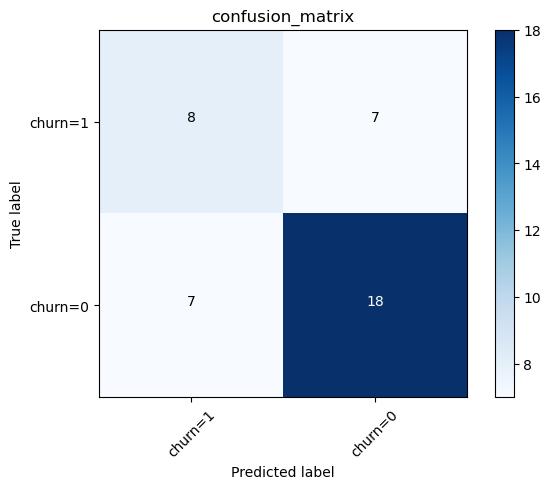

In [66]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2) ##making 2 floating points only

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,title='confusion_matrix')


In [69]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        25
           1       0.53      0.53      0.53        15

    accuracy                           0.65        40
   macro avg       0.63      0.63      0.63        40
weighted avg       0.65      0.65      0.65        40



In [70]:
from sklearn.metrics import log_loss

log_loss(y_test,yhat_prob)

0.6155809757244557

In [74]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C = 0.1, solver='newton-cg').fit(X_train,y_train)

new_proba = model.predict_proba(X_test)

log_loss(y_test, new_proba)

c:\Users\Mostafa Arafa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6567544824484391